**Molecular Dynamics simulation routine:**

this is some text that explains stuff you do.

* Import external libraries:

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import copy
import numpy as np
import scipy as scy

* Creating a particle class:

In [2]:
class Particle:
    def __init__(self, r, x, y, vx, vy):
        self.r = r
        self.x = x
        self.y = y
        self.coords = [x,y]
        self.vx = vx
        self.vy = vy
        self.v = [vx,vy]
        
    def __repr__(self):
        return str("This is a particle at %0.2f, %0.2f with v=%0.2f,%0.2f" % (self.x,self.y,self.vx,self.vy))

* Defining the box:

In [3]:
box_size_x = 20
box_size_y = 20

box = [box_size_x,box_size_y]

In [4]:
number_of_particles = 2

* Initialize velocities:

In [5]:
vel = np.ones(number_of_particles)*0.5
angles = np.random.uniform(0,2*np.pi,number_of_particles)


* Initialize position:

In [6]:
x_rand = np.random.randint(1,box[0]-1,number_of_particles)
y_rand = np.random.randint(1,box[1]-1,number_of_particles)


* Setting up the particle:

In [7]:
particles = []
for i in range(number_of_particles):
    particles.append(Particle(0.5,x_rand[i],y_rand[i],np.sin(angles[i])*vel[i],np.cos(angles[i])*vel[i]))


* Defining simulation step numbers

In [8]:
steps = 50

* initialize trajectory:

In [9]:
data_traj = np.zeros((number_of_particles,4,steps))
data_traj.shape

(2, 4, 50)

* define time integrator for numerical, stepwise solution of equation of motion with a discrete time step $dt$:

In [11]:
def move_unbound(p,dt):
    p.x = np.mod(p.x + p.vx*dt,box_size_x)
    p.y = np.mod(p.y + p.vy*dt,box_size_y)
    return p

* define box reflection:

In [105]:
# https://hermann-baum.de/elastischer_stoss/
def collide_boundary(particles,step):
    for i in range(len(particles)):
        for j in range(len(particles)):
            if i < j:
                #print(i,j)
                distance = np.sqrt(np.abs(particles[i].x-particles[j].x)**2+np.abs(particles[i].y-particles[j].y)**2)
                if distance<(particles[i].r+particles[j].r):
                    print(step)
                    print(particles[i],particles[j],'collided with a distance of ', distance)
                    # angle between x-axis and line between particles
                    phi = np.arctan((particles[j].y - particles[i].y)/(particles[j].x - particles[i].x))

                    # move the particles out
                    distance_x = np.sign(particles[j].x-particles[i].x)*((particles[i].r+particles[j].r)-distance)*np.cos(phi)
                    distance_y = np.sign(particles[j].y-particles[i].y)*((particles[i].r+particles[j].r)-distance)*np.sin(phi)
                    print((particles[i].r+particles[j].r)-distance,phi,np.cos(phi),np.sin(phi))
                    print(distance_x,distance_y)
                    particles[i].x  = particles[i].x - (distance_x/2)
                    particles[i].y  = particles[i].y - (distance_y/2)
                    particles[j].x  = particles[j].x + (distance_x/2)
                    particles[j].y  = particles[j].y + (distance_y/2)

                    # change the velocities
                    particles[i].vx = ( particles[i].vx*np.sin(phi)-particles[i].vy*np.cos(phi))*np.sin(phi) + (particles[j].vx*np.cos(phi)+particles[j].vy*np.sin(phi))*np.cos(phi)
                    particles[i].vy = (-particles[i].vx*np.sin(phi)+particles[i].vy*np.cos(phi))*np.cos(phi) + (particles[j].vx*np.cos(phi)+particles[j].vy*np.sin(phi))*np.sin(phi)
                    particles[j].vx = ( particles[j].vx*np.sin(phi)-particles[j].vy*np.cos(phi))*np.sin(phi) + (particles[i].vx*np.cos(phi)+particles[i].vy*np.sin(phi))*np.cos(phi)
                    particles[j].vy = (-particles[j].vx*np.sin(phi)+particles[j].vy*np.cos(phi))*np.cos(phi) + (particles[i].vx*np.cos(phi)+particles[i].vy*np.sin(phi))*np.sin(phi)
                    distance = np.sqrt(np.abs(particles[i].x-particles[j].x)**2+np.abs(particles[i].y-particles[j].y)**2)
                    print(particles[i],particles[j],'collided with a distance of ', distance)
                    

In [ ]:
def search_intersection(p,steps):


In [19]:
def perp( a ) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

# line segment a given by endpoints a1, a2
# line segment b given by endpoints b1, b2
# return 
def seg_intersect(a1,a2, b1,b2) :
    da = a2-a1
    db = b2-b1
    dp = a1-b1
    dap = perp(da)
    denom = np.dot( dap, db)
    num = np.dot( dap, dp )
    return (num / denom)*db + b1

p1 = np.array( [0.0, 0.0] )
p2 = np.array( [1.0, 0.1] )

p3 = np.array( [4.0, -5.0] )
p4 = np.array( [3.0, 2.0] )

print(seg_intersect( p1,p2, p3,p4))

[3.23943662 0.32394366]


In [108]:
particles[0].x = 5
particles[0].y = 10
particles[0].vx = 0.4
particles[0].vy = 0

particles[1].x = 15
particles[1].y = 10
particles[1].vx = -0.4
particles[1].vy = 0

* carry out simulation:

In [109]:
for i in range(steps):
    for j in range(number_of_particles):
        #move(p1,1)
        #reflect(p1)
        move_unbound(particles[j],1)
    collide_boundary(particles,i)
    for j in range(number_of_particles):
        data_traj[j,:,i] = [particles[j].x, particles[j].y, particles[j].vx, particles[j].vy]
        

11
This is a particle at 9.80, 10.00 with v=0.40,0.00 This is a particle at 10.20, 10.00 with v=-0.40,0.00 collided with a distance of  0.3999999999999915
0.6000000000000085 0.0 1.0 0.0
0.6000000000000085 0.0
This is a particle at 9.50, 10.00 with v=-0.40,0.00 This is a particle at 10.50, 10.00 with v=-0.40,0.00 collided with a distance of  1.0
25
This is a particle at 3.90, 10.00 with v=-0.40,0.00 This is a particle at 4.90, 10.00 with v=-0.40,0.00 collided with a distance of  0.9999999999999996
4.440892098500626e-16 0.0 1.0 0.0
4.440892098500626e-16 0.0
This is a particle at 3.90, 10.00 with v=-0.40,0.00 This is a particle at 4.90, 10.00 with v=-0.40,0.00 collided with a distance of  1.0
26
This is a particle at 3.50, 10.00 with v=-0.40,0.00 This is a particle at 4.50, 10.00 with v=-0.40,0.00 collided with a distance of  0.9999999999999996
4.440892098500626e-16 0.0 1.0 0.0
4.440892098500626e-16 0.0
This is a particle at 3.50, 10.00 with v=-0.40,0.00 This is a particle at 4.50, 10.00 

In [110]:
#data_traj

* Plotting trajectory with Matplotlib:

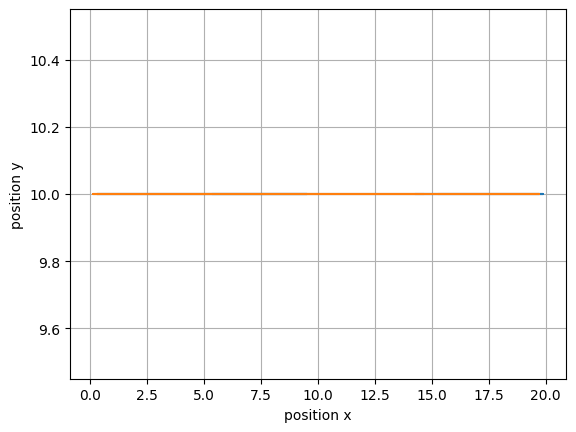

In [111]:
for data_traj_j in data_traj:
    plt.plot(data_traj_j[0],data_traj_j[1],'-')
plt.xlabel('position x')
plt.ylabel('position y')

plt.grid()
plt.show()

**Animate trajectory:**

* Set up the figure, the axis, and the plot element we want to animate

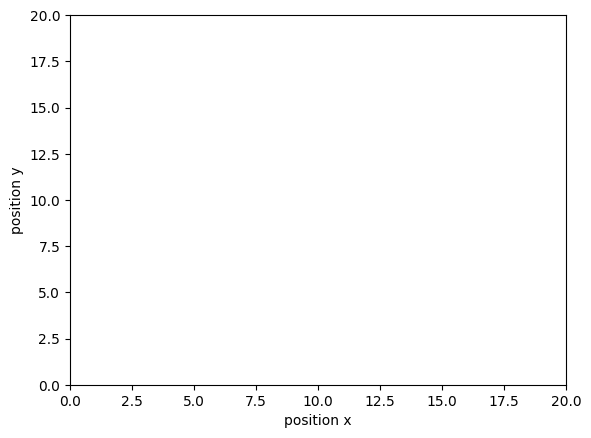

In [112]:
fig, ax = plt.subplots()

ax.set_xlim((0, box[0]))
ax.set_ylim((0, box[1]))

plt.xlabel('position x')
plt.ylabel('position y')

dot, = ax.plot([], [], 'bo', ms=5.0)


* initialization function: plot the background of each frame

In [113]:
def init():
    dot.set_data([], [])
    return (dot,)

In [114]:
data_traj[:,0,1]

array([ 5.8, 14.2])

* animation function. This is called sequentially

In [115]:
def animate(i):
    x = data_traj[:,0,i]
    y = data_traj[:,1,i]
    dot.set_data(x, y)
    return (dot,)

* call the animator. blit=True means only re-draw the parts that have changed.

In [116]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=steps, interval=60, blit=True)

In [117]:
HTML(anim.to_html5_video())

**Histogramming:**

KeyboardInterrupt: 

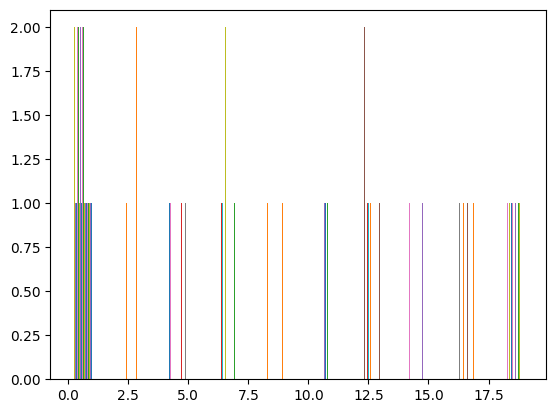

In [173]:
plt.hist(data_traj[0],range=(0,box[0]),bins=10)
plt.xlabel('position x')
plt.ylabel('occupancy')
plt.show()

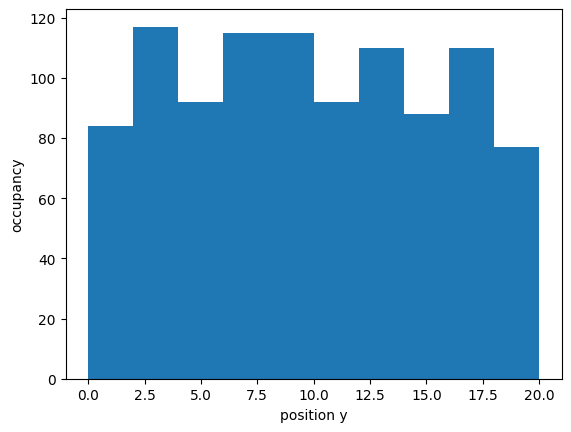

In [22]:
plt.hist(data_traj[1],range=(0,box[1]),bins=10)
plt.xlabel('position y')
plt.ylabel('occupancy')
plt.show()

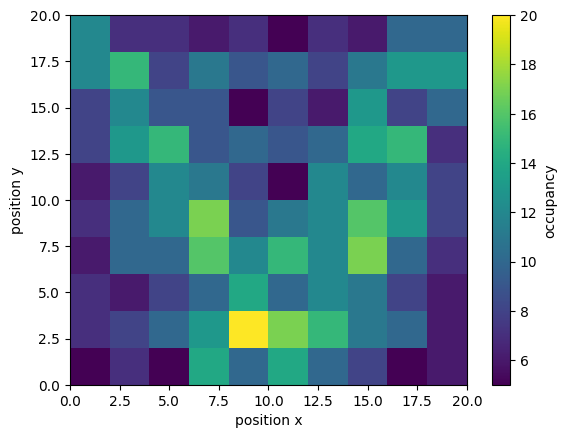

In [23]:
plt.hist2d(data_traj[0], data_traj[1], range=[[0,box[0]],[0,box[1]]], bins=10)
plt.xlabel('position x')
plt.ylabel('position y')
plt.colorbar().set_label('occupancy')
plt.show()

**Interpretation:**
* in the reduced data projection, the occupancy of each bin seems even and well-distributed
* in the full dimensional projection, it can be seen easily that the box is **not** fully sampled, large undersampled patches present
* *data dimensionality reduction always brings the danger of wrong projection!*

**Solution for improvements:**
* enhance sampling by
    * prolong the simulation
    * increase the time step
* *Caveat: all solutions come with problems like increased computational cost or sampling errors!*